## Lesson 7e -Pandas  

* Here we will introduce Features of Pandas. 


### Table of Contents

* Processing and adjusting time series


#### Library features

* **DataFrame object** for data manipulation with integrated indexing
* Tools for reading and writing data between in-memory data structures and different file formats
* **Data alignment** and integrated handling of **missing data**
* **Reshaping** and **pivoting** of data sets
* Label-based slicing, fancy indexing, and subsetting of large data sets
* Data structure column insertion and deletion
* Group-by engine allowing split-apply-combine operations on data sets
* Data set merging and joining
* Hierarchical axis indexing to work with high-dimensional data in a lower-dimensional data structure
* **Time series-functionality**: date range generation and frequency conversion, moving window statistics, moving window linear regressions, date shifting and lagging

The library is highly optimized for performance, with critical code paths written in Cython or C.

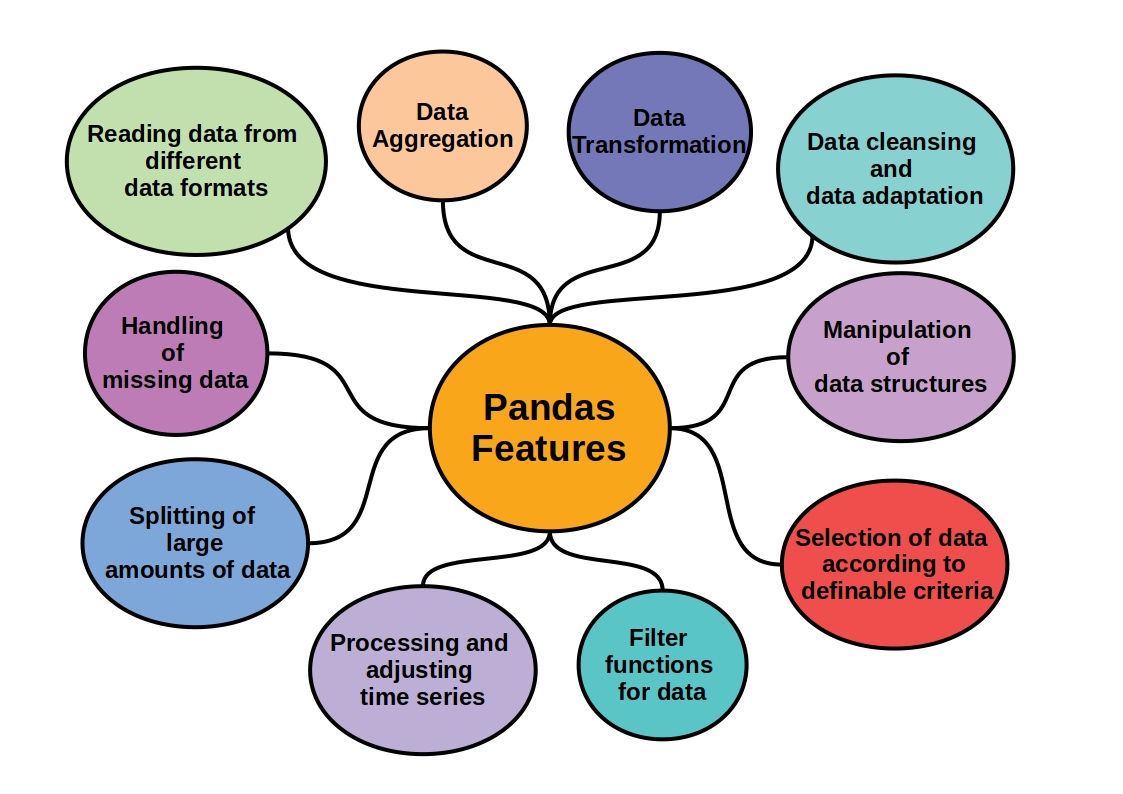

### Working with Time Series

Pandas was developed in the context of financial modeling, it contains a fairly extensive set of tools for working with dates, times, and time-indexed data. Date and time data comes in a few flavors, which we will discuss here.


* **Time stamps** reference particular moments in time (e.g., July 4th, 2015 at 7:00am).
* **Time intervals** and periods reference a length of time between a particular beginning and end point; for example, the year 2015. Periods usually reference a special case of time intervals in which each interval is of uniform length and does not overlap (e.g., 24 hour-long periods comprising days).
* **Time deltas or durations** reference an exact length of time (e.g., a duration of 22.56 seconds).

In [ ]:
#!pip3 install scipy

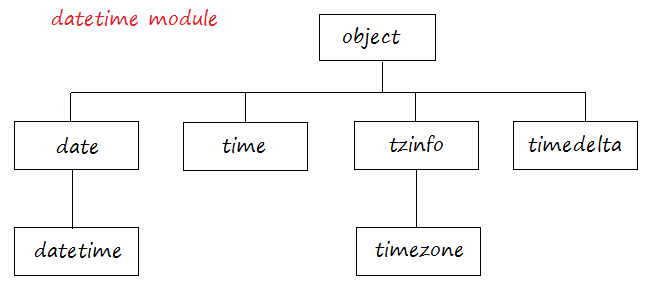

<table style="width:100%">
	<tbody>
		<tr>
			<td style="text-align:left"><strong>Class</strong></td>
			<td style="text-align:left"><strong>Discription</strong></td>
		</tr>
		<tr>
			<td style="text-align:left">datetime.date</td>
			<td style="text-align:left">A date object represents a date, excluding time.</td>
		</tr>
		<tr>
			<td style="text-align:left">datetime.datetime</td>
			<td style="text-align:left">A datetime object represents a date and time.</td>
		</tr>
		<tr>
			<td style="text-align:left">datetime.time</td>
			<td style="text-align:left">A time object represents time, excluding date.</td>
		</tr>
		<tr>
			<td style="text-align:left">datetime.tzinfo</td>
			<td style="text-align:left">A base abstract class for time zone information objects.</td>
		</tr>
		<tr>
			<td style="text-align:left">datetime.timezone</td>
			<td style="text-align:left">A direct child class of the tzinfo class, in UTC (Coordinated Universal Time).</td>
		</tr>
		<tr>
			<td style="text-align:left">datetime.timedelta</td>
			<td style="text-align:left">A timedelta object represents a duration, the difference between two dates or times.</td>
		</tr>
	</tbody>
</table>

## Python dates and times:  datetime and dateutil

Python's objects for working with **dates** and **times** reside in the built-in **datetime** module. Along with the third-party **dateutil** module, you can use it to quickly perform a host of useful functionalities on **dates** and **times**. For example, you can manually build a **date** using the **datetime** type.

In [ ]:
from datetime import datetime
datetime(year=2015, month=7, day=4)

using the **dateutil** module, you can parse dates from a variety of string formats.

In [ ]:
from dateutil import parser
date = parser.parse("1st of July, 2015")

In [ ]:
date

Once you have a **datetime object**, you can do things like printing the **day of the week**.

In [ ]:
# datetime to string using strftime()
date.strftime('%A')

In [ ]:
now = datetime.now() # current date and time

year = now.strftime("%Y")
print("year:", year)

month = now.strftime("%m")
print("month:", month)

day = now.strftime("%d")
print("day:", day)

time = now.strftime("%H:%M:%S")
print("time:", time)

date_time = now.strftime("%m/%d/%Y, %H:%M:%S")
print("date and time:",date_time)

<h2><a id="format-code" name="format-code"></a>Format Code List</h2>

<p>The table below shows all the codes that you can pass to the <code>strftime()</code> method.</p>

<table style="width:100%">
	<thead>
		<tr>
			<td style="text-align:left"><strong>Directive</strong></td>
			<td style="text-align:left"><strong>Meaning</strong></td>
			<td style="text-align:left"><strong>Example</strong></td>
		</tr>
	</thead>
	<tbody>
		<tr>
			<td style="text-align:left"><code>%a</code></td>
			<td style="text-align:left">Abbreviated weekday name.</td>
			<td style="text-align:left">Sun, Mon, ...</td>
		</tr>
		<tr>
			<td style="text-align:left"><code>%A</code></td>
			<td style="text-align:left">Full weekday name.</td>
			<td style="text-align:left">Sunday, Monday, ...</td>
		</tr>
		<tr>
			<td style="text-align:left"><code>%w</code></td>
			<td style="text-align:left">Weekday as a decimal number.</td>
			<td style="text-align:left">0, 1, ..., 6</td>
		</tr>
		<tr>
			<td style="text-align:left"><code>%d</code></td>
			<td style="text-align:left">Day of the month as a zero-padded decimal.</td>
			<td style="text-align:left">01, 02, ..., 31</td>
		</tr>
		<tr>
			<td style="text-align:left"><code>%-d</code></td>
			<td style="text-align:left">Day of the month as a decimal number.</td>
			<td style="text-align:left">1, 2, ..., 30</td>
		</tr>
		<tr>
			<td style="text-align:left"><code>%b</code></td>
			<td style="text-align:left">Abbreviated month name.</td>
			<td style="text-align:left">Jan, Feb, ..., Dec</td>
		</tr>
		<tr>
			<td style="text-align:left"><code>%B</code></td>
			<td style="text-align:left">Full month name.</td>
			<td style="text-align:left">January, February, ...</td>
		</tr>
		<tr>
			<td style="text-align:left"><code>%m</code></td>
			<td style="text-align:left">Month as a zero-padded decimal number.</td>
			<td style="text-align:left">01, 02, ..., 12</td>
		</tr>
		<tr>
			<td style="text-align:left"><code>%-m</code></td>
			<td style="text-align:left">Month as a decimal number.</td>
			<td style="text-align:left">1, 2, ..., 12</td>
		</tr>
		<tr>
			<td style="text-align:left"><code>%y</code></td>
			<td style="text-align:left">Year without century as a zero-padded decimal number.</td>
			<td style="text-align:left">00, 01, ..., 99</td>
		</tr>
		<tr>
			<td style="text-align:left"><code>%-y</code></td>
			<td style="text-align:left">Year without century as a decimal number.</td>
			<td style="text-align:left">0, 1, ..., 99</td>
		</tr>
		<tr>
			<td style="text-align:left"><code>%Y</code></td>
			<td style="text-align:left">Year with century as a decimal number.</td>
			<td style="text-align:left">2013, 2019 etc.</td>
		</tr>
		<tr>
			<td style="text-align:left"><code>%H</code></td>
			<td style="text-align:left">Hour (24-hour clock) as a zero-padded decimal number.</td>
			<td style="text-align:left">00, 01, ..., 23</td>
		</tr>
		<tr>
			<td style="text-align:left"><code>%-H</code></td>
			<td style="text-align:left">Hour (24-hour clock) as a decimal number.</td>
			<td style="text-align:left">0, 1, ..., 23</td>
		</tr>
		<tr>
			<td style="text-align:left"><code>%I</code></td>
			<td style="text-align:left">Hour (12-hour clock) as a zero-padded decimal number.</td>
			<td style="text-align:left">01, 02, ..., 12</td>
		</tr>
		<tr>
			<td style="text-align:left"><code>%-I</code></td>
			<td style="text-align:left">Hour (12-hour clock) as a decimal number.</td>
			<td style="text-align:left">1, 2, ... 12</td>
		</tr>
		<tr>
			<td style="text-align:left"><code>%p</code></td>
			<td style="text-align:left">Locale’s AM or PM.</td>
			<td style="text-align:left">AM, PM</td>
		</tr>
		<tr>
			<td style="text-align:left"><code>%M</code></td>
			<td style="text-align:left">Minute as a zero-padded decimal number.</td>
			<td style="text-align:left">00, 01, ..., 59</td>
		</tr>
		<tr>
			<td style="text-align:left"><code>%-M</code></td>
			<td style="text-align:left">Minute as a decimal number.</td>
			<td style="text-align:left">0, 1, ..., 59</td>
		</tr>
		<tr>
			<td style="text-align:left"><code>%S</code></td>
			<td style="text-align:left">Second as a zero-padded decimal number.</td>
			<td style="text-align:left">00, 01, ..., 59</td>
		</tr>
		<tr>
			<td style="text-align:left"><code>%-S</code></td>
			<td style="text-align:left">Second as a decimal number.</td>
			<td style="text-align:left">0, 1, ..., 59</td>
		</tr>
		<tr>
			<td style="text-align:left"><code>%f</code></td>
			<td style="text-align:left">Microsecond as a decimal number, zero-padded on the left.</td>
			<td style="text-align:left">000000 - 999999</td>
		</tr>
		<tr>
			<td style="text-align:left"><code>%z</code></td>
			<td style="text-align:left">UTC offset in the form +HHMM or -HHMM.</td>
			<td style="text-align:left"> </td>
		</tr>
		<tr>
			<td style="text-align:left"><code>%Z</code></td>
			<td style="text-align:left">Time zone name.</td>
			<td style="text-align:left"> </td>
		</tr>
		<tr>
			<td style="text-align:left"><code>%j</code></td>
			<td style="text-align:left">Day of the year as a zero-padded decimal number.</td>
			<td style="text-align:left">001, 002, ..., 366</td>
		</tr>
		<tr>
			<td style="text-align:left"><code>%-j</code></td>
			<td style="text-align:left">Day of the year as a decimal number.</td>
			<td style="text-align:left">1, 2, ..., 366</td>
		</tr>
		<tr>
			<td style="text-align:left"><code>%U</code></td>
			<td style="text-align:left">Week number of the year (Sunday as the first day of the week). All days in a new year preceding the first Sunday are considered to be in week 0.</td>
			<td style="text-align:left">00, 01, ..., 53</td>
		</tr>
		<tr>
			<td style="text-align:left"><code>%W</code></td>
			<td style="text-align:left">Week number of the year (Monday as the first day of the week). All days in a new year preceding the first Monday are considered to be in week 0.</td>
			<td style="text-align:left">00, 01, ..., 53</td>
		</tr>
		<tr>
			<td style="text-align:left"><code>%c</code></td>
			<td style="text-align:left">Locale’s appropriate date and time representation.</td>
			<td style="text-align:left">Mon Sep 30 07:06:05 2013</td>
		</tr>
		<tr>
			<td style="text-align:left"><code>%x</code></td>
			<td style="text-align:left">Locale’s appropriate date representation.</td>
			<td style="text-align:left">09/30/13</td>
		</tr>
		<tr>
			<td style="text-align:left"><code>%X</code></td>
			<td style="text-align:left">Locale’s appropriate time representation.</td>
			<td style="text-align:left">07:06:05</td>
		</tr>
		<tr>
			<td style="text-align:left"><code>%%</code></td>
			<td style="text-align:left">A literal '%' character.</td>
			<td style="text-align:left">%</td>
		</tr>
	</tbody>
</table>


## Typed arrays of times: NumPy's datetime64

The weaknesses of Python's datetime format inspired the **NumPy** team to add a set of native time series data type to **NumPy**. The **datetime64** dtype encodes dates as 64-bit integers, and thus allows arrays of dates to be represented very compactly. The datetime64 requires a very specific input format:

In [ ]:
import numpy as np
date = np.array('2015-07-04', dtype=np.datetime64)

In [ ]:
date

Once we have this date formatted, however, we can quickly do vectorized operations on it.

In [ ]:
date + np.arange(30)

Because of the uniform type in **NumPy datetime64 arrays**, this type of operation can be accomplished much more quickly than if we were working directly with **Python's datetime objects**, especially as arrays get large (we introduced this type of **vectorization** in Computation on NumPy Arrays). 

NumPy will infer the desired unit from the input; for example, here is a day-based datetime:

In [ ]:
np.datetime64('2015-07-04')

Here is a minute-based datetime:

In [ ]:
np.datetime64('2015-07-04 12:00')

Notice that the **time zone** is automatically set to the local time on the computer executing the code. You can force any desired fundamental unit using one of many format codes; for example, here we'll force a **nanosecond-based time**:

In [ ]:
np.datetime64('2015-07-04 12:59:59.50', 'ns')

The following table, drawn from the **NumPy datetime64 documentation**, lists the available format codes along with the relative and absolute timespans that they can encode:

<table style="width:100%">
<thead><tr>
<th style="text-align:left">Code</th>
<th style="text-align:left">Meaning</th>
<th style="text-align:left">Time span (relative)</th>
<th style="text-align:left">Time span (absolute)</th>
</tr>
</thead>
<tbody>
<tr>
<td style="text-align:left"><code>Y</code></td>
<td style="text-align:left">Year</td>
<td style="text-align:left">± 9.2e18 years</td>
<td style="text-align:left">[9.2e18 BC, 9.2e18 AD]</td>
</tr>
<tr>
<td style="text-align:left"><code>M</code></td>
<td style="text-align:left">Month</td>
<td style="text-align:left">± 7.6e17 years</td>
<td style="text-align:left">[7.6e17 BC, 7.6e17 AD]</td>
</tr>
<tr>
<td style="text-align:left"><code>W</code></td>
<td style="text-align:left">Week</td>
<td style="text-align:left">± 1.7e17 years</td>
<td style="text-align:left">[1.7e17 BC, 1.7e17 AD]</td>
</tr>
<tr>
<td style="text-align:left"><code>D</code></td>
<td style="text-align:left">Day</td>
<td style="text-align:left">± 2.5e16 years</td>
<td style="text-align:left">[2.5e16 BC, 2.5e16 AD]</td>
</tr>
<tr>
<td style="text-align:left"><code>h</code></td>
<td style="text-align:left">Hour</td>
<td style="text-align:left">± 1.0e15 years</td>
<td style="text-align:left">[1.0e15 BC, 1.0e15 AD]</td>
</tr>
<tr>
<td style="text-align:left"><code>m</code></td>
<td style="text-align:left">Minute</td>
<td style="text-align:left">± 1.7e13 years</td>
<td style="text-align:left">[1.7e13 BC, 1.7e13 AD]</td>
</tr>
<tr>
<td style="text-align:left"><code>s</code></td>
<td style="text-align:left">Second</td>
<td style="text-align:left">± 2.9e12 years</td>
<td style="text-align:left">[ 2.9e9 BC, 2.9e9 AD]</td>
</tr>
<tr>
<td style="text-align:left"><code>ms</code></td>
<td style="text-align:left">Millisecond</td>
<td style="text-align:left">± 2.9e9 years</td>
<td style="text-align:left">[ 2.9e6 BC, 2.9e6 AD]</td>
</tr>
<tr>
<td style="text-align:left"><code>us</code></td>
<td style="text-align:left">Microsecond</td>
<td style="text-align:left">± 2.9e6 years</td>
<td style="text-align:left">[290301 BC, 294241 AD]</td>
</tr>
<tr>
<td style="text-align:left"><code>ns</code></td>
<td style="text-align:left">Nanosecond</td>
<td style="text-align:left">± 292 years</td>
<td style="text-align:left">[ 1678 AD, 2262 AD]</td>
</tr>
<tr>
<td style="text-align:left"><code>ps</code></td>
<td style="text-align:left">Picosecond</td>
<td style="text-align:left">± 106 days</td>
<td style="text-align:left">[ 1969 AD, 1970 AD]</td>
</tr>
<tr>
<td style="text-align:left"><code>fs</code></td>
<td style="text-align:left">Femtosecond</td>
<td style="text-align:left">± 2.6 hours</td>
<td style="text-align:left">[ 1969 AD, 1970 AD]</td>
</tr>
<tr>
<td style="text-align:left"><code>as</code></td>
<td style="text-align:left">Attosecond</td>
<td style="text-align:left">± 9.2 seconds</td>
<td style="text-align:left">[ 1969 AD, 1970 AD]</td>
</tr>
</tbody>
</table>


For the types of data we see in the real world, a useful default is **datetime64[ns]**, as it can encode a useful range of modern dates with a suitably fine precision.

Finally, we will note that while the **datetime64** data type addresses some of the deficiencies of the built-in Python datetime type, it lacks many of the convenient methods and functions provided by datetime and especially dateutil. 

### Dates and times in pandas: best of both worlds

Pandas  provide a Timestamp object, which combines the ease-of-use of **datetime and dateutil** with the efficient storage and vectorized interface of **numpy.datetime64**. From a group of these Timestamp objects, Pandas can construct a **DatetimeIndex** that can be used to index data in a Series or DataFrame; we'll see many examples of this below.

For example, we can use Pandas tools to repeat the demonstration from above. We can parse a flexibly formatted string date, and use format codes to output the day of the week:

In [ ]:
import pandas as pd
date = pd.to_datetime("5th of July, 2015")
date

In [ ]:
date.strftime('%A')

Additionally, we can do **NumPy-style vectorized operations** directly on this same object:

In [ ]:
date + pd.to_timedelta(np.arange(12), 'D')

In the next section, we will take a closer look at manipulating time series data with the tools provided by Pandas.

### Pandas Time Series: Indexing by Time

Where the Pandas time series tools really become useful is when you begin to **index data by timestamps**. For example, we can construct a Series object that has **time indexed data**:

In [ ]:
index = pd.DatetimeIndex(['2014-07-04', '2014-08-04',
                          '2015-07-04', '2015-08-04'])
data = pd.Series([0, 1, 2, 3], index=index)

In [ ]:
data.head()

Now that we have this data in a Series, we can make use of any of the Series indexing patterns  passing values that can be coerced into dates:

In [ ]:
data['2014-07-04':'2015-07-04']

There are additional special date-only indexing operations, such as passing a year to obtain a slice of all data from that year:

In [ ]:
data['2015']

Later, we will see additional examples of the convenience of **dates-as-indices**. But first, a closer look at the available time series data structures.

### Pandas Time Series Data Structures

This section will introduce the fundamental Pandas data structures for working with **time series data**:

* For time stamps, **Pandas provides the Timestamp type**, it is essentially a replacement for Python's native datetime, but is based on the more efficient numpy.datetime64 data type. The associated Index structure is **DatetimeIndex**.
* For time Periods, **Pandas provides the Period type**, This encodes a fixed-frequency interval based on numpy.datetime64. The associated index structure is **PeriodIndex**.
* For time deltas or durations, **Pandas provides the Timedelta type**. Timedelta is a more efficient replacement for Python's native datetime.timedelta type, and is based on numpy.timedelta64. The associated index structure is **TimedeltaIndex**.

The most fundamental of these date/time objects are the **Timestamp and DatetimeIndex objects**. While these class objects can be invoked directly, it is more common to use the **pd.to_datetime()** function, which can parse a wide variety of formats. Passing a single date to **pd.to_datetime()** yields a Timestamp; passing a series of dates by default yields a **DatetimeIndex**:

In [ ]:
dates = pd.to_datetime([datetime(2015, 7, 3), '4th of July, 2015', 
                        '2015-Jul-6', '07-07-2015', '20150708'])

In [ ]:
dates

Any **DatetimeIndex** can be converted to a **PeriodIndex** with the **to_period()** function with the addition of a frequency code; here we'll use **'D'** to indicate daily frequency.

In [ ]:
dates.to_period('D')

A **TimedeltaIndex** is created, for example, when a date is subtracted from another:

In [ ]:
dates - dates[0]

# Regular sequences

To make the creation of regular date sequences more convenient, Pandas offers a few functions for this purpose: **pd.date_range() for timestamps**, **pd.period_range()** for periods, and **pd.timedelta_range()** for time deltas. We've seen that Python's **range()** and NumPy's **np.arange()**  turn a startpoint, endpoint, and optional stepsize into a sequence. Similarly, **pd.date_range()**  accepts a start date, an end date, and an optional frequency code to create a regular sequence of dates. By default, the frequency is one day:

In [ ]:
pd.date_range('2015-07-03', '2015-07-10')

Alternatively, the date range can be specified not with a start and endpoint, but with a startpoint and a number of periods:

In [ ]:
pd.date_range('2015-07-03', periods=8)

The spacing can be modified by altering the freq argument, which defaults to D. For example, here we will construct a range of **hourly timestamps**:

In [ ]:
pd.date_range('2015-07-03', periods=8, freq='H')

To create regular sequences of Period or **Timedelta** values, the very similar **pd.period_range()** and **pd.timedelta_range()** functions are useful. Here are some monthly periods:

In [ ]:
pd.period_range('2015-07', periods=8, freq='M')

And a sequence of durations increasing by an hour:

In [ ]:
pd.timedelta_range(0, periods=10, freq='D')

All of these require an understanding of Pandas frequency codes, which we'll summarize in the next section.

## Frequencies and Offsets

Fundamental to these Pandas time series tools is the concept of a **frequency or date offset**. Just as we saw the **D (day) and H (hour) codes** above, we can use such codes to specify any desired frequency spacing. The following table summarizes the main codes available:

<table style="width:100%">
<thead><tr>
<th style="text-align:left">Code</th>
<th style="text-align:left">Description</th>
<th style="text-align:left">Code</th>
<th style="text-align:left">Description</th>
</tr>
</thead>
<tbody>
<tr>
<td style="text-align:left"><code>D</code></td>
<td style="text-align:left">Calendar day</td>
<td style="text-align:left"><code>B</code></td>
<td style="text-align:left">Business day</td>
</tr>
<tr>
<td style="text-align:left"><code>W</code></td>
<td style="text-align:left">Weekly</td>
<td style="text-align:left"></td>
<td style="text-align:left"></td>
    </tr>
<tr>
<td style="text-align:left"><code>M</code></td>
<td style="text-align:left">Month end</td>
<td style="text-align:left"><code>BM</code></td>
<td style="text-align:left" >Business month end</td>
</tr>
<tr>
<td style="text-align:left"><code>Q</code></td>
<td style="text-align:left">Quarter end</td>
<td style="text-align:left"><code>BQ</code></td>
<td style="text-align:left">Business quarter end</td>
</tr>
<tr>
<td style="text-align:left"><code>A</code></td>
<td style="text-align:left">Year end</td>
<td style="text-align:left"><code>BA</code></td>
<td style="text-align:left">Business year end</td>
</tr>
<tr>
<td style="text-align:left"><code>H</code></td>
<td style="text-align:left">Hours</td>
<td style="text-align:left"><code>BH</code></td>
<td style="text-align:left">Business hours</td>
</tr>
<tr>
<td style="text-align:left"><code>T</code></td>
<td style="text-align:left">Minutes</td>
<td style="text-align:left"></td>
<td style="text-align:left"></td>
</tr>
<tr>
<td style="text-align:left"><code>S</code></td>
<td style="text-align:left">Seconds</td>
<td style="text-align:left"></td>
<td style="text-align:left"></td>
</tr>
<tr>
<td style="text-align:left"><code>L</code></td>
<td style="text-align:left">Milliseonds</td>
<td style="text-align:left"></td>
<td style="text-align:left"></td>
</tr>
<tr>
<td style="text-align:left"><code>U</code></td>
<td style="text-align:left">Microseconds</td>
<td style="text-align:left"></td>
<td style="text-align:left"></td>
</tr>
<tr>
<td style="text-align:left"><code>N</code></td>
<td style="text-align:left">nanoseconds</td>
<td style="text-align:left"></td>
<td style="text-align:left"></td>
</tr>
</tbody>
</table>

The **monthly, quarterly, and annual frequencies** are all marked at the end of the specified period. By adding an **S** suffix to any of these, they instead will be marked at the beginning:

<table>
<thead><tr>
<th>Code</th>
<th>Description</th>
<th></th>
<th>Code</th>
<th>Description</th>
</tr>
</thead>
<tbody>
<tr>
<td><code>MS</code></td>
<td>Month start</td>
<td></td>
<td><code>BMS</code></td>
<td>Business month start</td>
</tr>
<tr>
<td><code>QS</code></td>
<td>Quarter start</td>
<td></td>
<td><code>BQS</code></td>
<td>Business quarter start</td>
</tr>
<tr>
<td><code>AS</code></td>
<td>Year start</td>
<td></td>
<td><code>BAS</code></td>
<td>Business year start</td>
</tr>
</tbody>
</table>

Codes can be combined with numbers to specify other frequencies. For example, for a frequency of 2 hours 30 minutes, we can combine the hour (H) and minute (T) codes as follows:

In [ ]:
pd.timedelta_range(0, periods=9, freq="2H30T")

All of these short codes refer to specific instances of Pandas time series offsets, which can be found in the **pd.tseries.offsets** module. For example, we can create a business day offset directly as follows:

In [ ]:
from pandas.tseries.offsets import BDay
pd.date_range('2015-07-01', periods=5, freq=BDay())

## Resampling, Shifting, and Windowing

The ability to use dates and times as indices to intuitively organize and access data is an important piece of the Pandas time series tools. The benefits of indexed data in general (automatic alignment during operations, intuitive data slicing and access, etc.) still apply, and Pandas provides several additional time series-specific operations.

We will take a look at a few of those here, using some stock price data as an example. Because Pandas was developed largely in a finance context, it includes some very specific tools for financial data. For example, the accompanying **pandas-datareader package (installable via conda install pandas-datareader)**, knows how to import financial data from a number of available sources, including **Yahoo finance, Google Finance**, and others. Here we will load **Google's closing price history**:

In [6]:
import yfinance as yf

In [7]:
import pandas as pd
import pandas_datareader.data as web
from datetime import datetime
end = datetime.now()
start = datetime(end.year - 3, end.month,end.day)

yf.pdr_override() 
from pandas_datareader import data as pdr

data = pdr.get_data_yahoo("TSLA", start, end)

[*********************100%***********************]  1 of 1 completed


In [16]:
data.head(50)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-06-01,57.200001,59.933334,56.939999,59.873333,59.873333,224092500
2020-06-02,59.646667,60.577332,58.066666,58.770668,58.770668,203484000
2020-06-03,59.208000,59.862667,58.673332,58.863998,58.863998,119242500
2020-06-04,59.325333,59.716667,57.229332,57.625332,57.625332,133315500
2020-06-05,58.522667,59.101334,57.746666,59.043999,59.043999,117178500
2020-06-08,61.266666,63.333332,60.610668,63.327999,63.327999,212620500
2020-06-09,62.667332,63.629333,61.595333,62.711334,62.711334,170823000
2020-06-10,66.125336,68.498665,65.500000,68.336670,68.336670,278451000
2020-06-11,66.013336,67.930664,64.800003,64.856003,64.856003,238747500


We will consider the closing price of `Tesla` for last one year

In [9]:
type(data)

pandas.core.frame.DataFrame

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 755 entries, 2020-06-01 to 2023-05-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       755 non-null    float64
 1   High       755 non-null    float64
 2   Low        755 non-null    float64
 3   Close      755 non-null    float64
 4   Adj Close  755 non-null    float64
 5   Volume     755 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 41.3 KB


In [11]:
colsing_price = data['Close']
colsing_price

Date
2020-06-01     59.873333
2020-06-02     58.770668
2020-06-03     58.863998
2020-06-04     57.625332
2020-06-05     59.043999
                 ...    
2023-05-23    185.770004
2023-05-24    182.899994
2023-05-25    184.470001
2023-05-26    193.169998
2023-05-30    201.160004
Name: Close, Length: 755, dtype: float64

We can visualize the closing price using the **plot() method**.

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()

Text(0, 0.5, 'Closing Price')

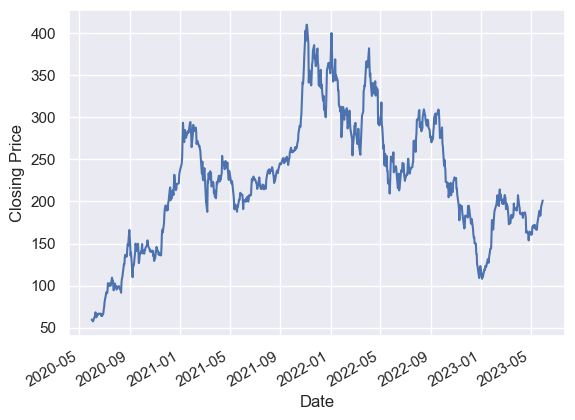

In [13]:
colsing_price.plot()
plt.ylabel("Closing Price")

### Resampling and converting frequencies
One common need for time series data is resampling at a higher or lower frequency. This can be done using the **resample()** method, or the much simpler **asfreq()** method. The primary difference between the two is that **resample()** is fundamentally a data aggregation, while **asfreq()** is fundamentally a data selection.

Taking a look at the TSLA closing price, let's compare what the two return when we down-sample the data. 

In [14]:
colsing_price.resample('M').mean()

Date
2020-06-30     64.236152
2020-07-31     97.342728
2020-08-31    120.019905
2020-09-30    137.831745
2020-10-31    142.403181
2020-11-30    155.204166
2020-12-31    212.939545
2021-01-31    276.258947
2021-02-28    264.756491
2021-03-31    218.934202
2021-04-30    236.539365
2021-05-31    205.584335
2021-06-30    208.973183
2021-07-31    219.711588
2021-08-31    235.081062
2021-09-30    251.317463
2021-10-31    292.783017
2021-11-30    373.554125
2021-12-31    339.629999
2022-01-31    336.722830
2022-02-28    292.961577
2022-03-31    304.793186
2022-04-30    332.462503
2022-05-31    255.223333
2022-06-30    234.025873
2022-07-31    251.394666
2022-08-31    294.869857
2022-09-30    288.734763
2022-10-31    223.810477
2022-11-30    191.246666
2022-12-31    152.970476
2023-01-31    134.195999
2023-02-28    199.775264
2023-03-31    188.522609
2023-04-30    176.955262
2023-05-31    174.459523
Freq: M, Name: Close, dtype: float64

In [20]:
#This does not fill NaNs that already were present before sampling.
#Optionally provide filling method to pad/backfill missing values.
#colsing_price.asfreq(freq='BM')
colsing_price.asfreq(freq='M',method='bfill')

Date
2020-06-30     71.987335
2020-07-31     95.384003
2020-08-31    166.106674
2020-09-30    143.003326
2020-10-31    133.503326
2020-11-30    189.199997
2020-12-31    235.223328
2021-01-31    279.936676
2021-02-28    239.476669
2021-03-31    222.643326
2021-04-30    236.479996
2021-05-31    207.966660
2021-06-30    226.566666
2021-07-31    236.556671
2021-08-31    245.240005
2021-09-30    258.493347
2021-10-31    402.863342
2021-11-30    381.586670
2021-12-31    352.260010
2022-01-31    312.239990
2022-02-28    290.143341
2022-03-31    359.200012
2022-04-30    300.980011
2022-05-31    252.753326
2022-06-30    224.473328
2022-07-31    297.276672
2022-08-31    275.609985
2022-09-30    265.250000
2022-10-31    227.539993
2022-11-30    194.699997
2022-12-31    108.099998
2023-01-31    173.220001
2023-02-28    205.710007
2023-03-31    207.460007
2023-04-30    161.830002
Freq: M, Name: Close, dtype: float64

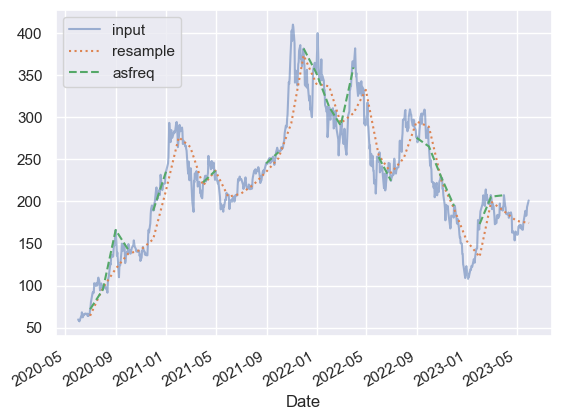

In [21]:
colsing_price.plot(alpha=0.5, style='-')
# Monhtly average of the closing price
colsing_price.resample('M').mean().plot(style=':')
# the above command will find the mean closing price
# of each month for a duration of 12 months.
colsing_price.asfreq('M').plot(style='--')
plt.legend(['input', 'resample', 'asfreq'],
           loc='upper left')

Notice the difference: at each point, resample reports the average of the previous month, while asfreq reports the value at the end of the Month.

## Upsampling

For up-sampling, resample() and asfreq() are largely equivalent, though resample has many more options available. In this case, the default for both methods is to leave the up-sampled points empty, that is, filled with NA values. Just as with the pd.fillna() function discussed previously, asfreq() accepts a method argument to specify how values are imputed. Here, we will resample the business day data at a daily frequency (i.e., including weekends):

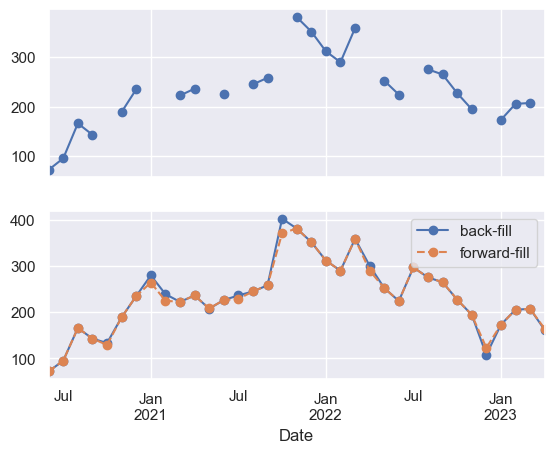

In [24]:
fig, ax = plt.subplots(2, sharex=True)
#data1 = data.iloc[:10]
colsing_price.asfreq('M').plot(ax=ax[0], marker='o')

colsing_price.asfreq('M', method='bfill').plot(ax=ax[1], style='-o')
colsing_price.asfreq('M', method='ffill').plot(ax=ax[1], style='--o')
ax[1].legend(["back-fill", "forward-fill"]);

The top panel is the default: non-business days are left as NA values and do not appear on the plot. The bottom panel shows the differences between two strategies for filling the gaps: forward-filling and backward-filling.

## Time-shifts

Another common time series-specific operation is shifting of data in time. Pandas has two closely related methods for computing this: **shift() and tshift()**:
The difference between them is that shift() shifts the data, while tshift() shifts the index. In both cases, the shift is specified in multiples of the frequency.

Here we will both shift() and tshift() by 30 days;

C:\Users\zakir\AppData\Local\Temp\ipykernel_7372\4098055911.py:15: FutureWarning: tshift is deprecated and will be removed in a future version. Please use shift instead.
  data2.tshift(days_shift).plot(ax=ax[2])


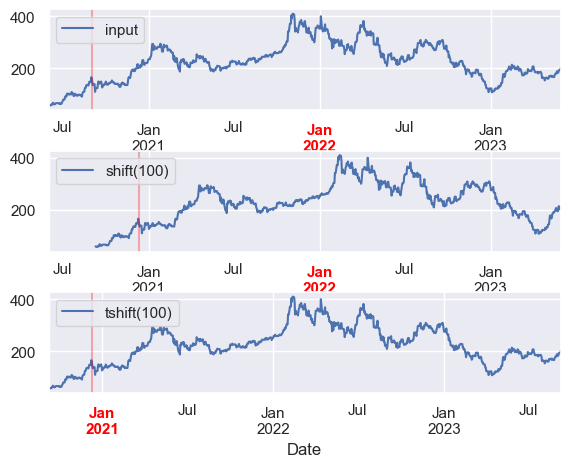

In [29]:
# one fig and 3 sub-plots  ax[0:2]
fig, ax = plt.subplots(3, sharey=True)
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=1,
                    hspace=0.4)

# apply a frequency to the data
data2 = colsing_price.asfreq('D', method='pad')
days_shift=100
data2.plot(ax=ax[0])
data2.shift(days_shift).plot(ax=ax[1])
data2.tshift(days_shift).plot(ax=ax[2])

# legends and annotations
local_max = pd.to_datetime('2020-09-01')

offset = pd.Timedelta(days_shift, 'D')

ax[0].legend(['input'], loc=2)
ax[0].get_xticklabels()[2].set(weight='heavy', color='red')
ax[0].axvline(local_max, alpha=0.3, color='red')

ax[1].legend([f'shift({days_shift})'], loc=2)
ax[1].get_xticklabels()[2].set(weight='heavy', color='red')
ax[1].axvline(local_max + offset, alpha=0.3, color='red')

ax[2].legend([f'tshift({days_shift})'], loc=2)
ax[2].get_xticklabels()[1].set(weight='heavy', color='red')
ax[2].axvline(local_max + offset, alpha=0.3, color='red');

We see here that shift(100) shifts the data by 100 days, pushing some of it off the end of the graph (and leaving NA values at the other end), while tshift(100) shifts the index values by 30 days.

Shifting can be very useful to calculate differences over time when you shift the data by a certain amount and then make comparisons.

It could  be helpful to look at a stock now compared to a year ago or some other time period to examine possible trends.

For example, we use shifted values to compute the 100 days return on investment for TESLA stock over the course of the dataset.


C:\Users\zakir\AppData\Local\Temp\ipykernel_7372\356523983.py:1: FutureWarning: tshift is deprecated and will be removed in a future version. Please use shift instead.
  ROI = 100 * (data2.tshift(-100) / data2-1)


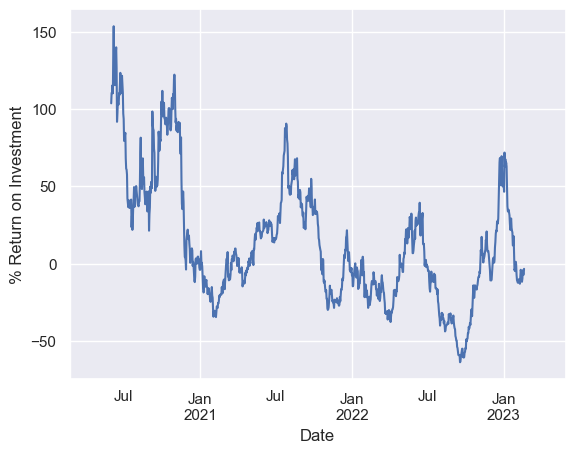

In [30]:
ROI = 100 * (data2.tshift(-100) / data2-1)
ROI.plot()
plt.ylabel('% Return on Investment');

## Rolling windows
* Rolling statistics are  type of time series-specific operation implemented by Pandas. These can be accomplished via the **rolling()** attribute of Series and DataFrame objects. 

* **A moving average**  takes the past days of numbers, takes the average of those days, and plots it on the graph.

* **Moving Standard Deviation** is a measure of **market volatility** in case of the stock market. It makes no predictions of market direction, but it may serve as a confirming indicator.

* Volatility is a measure of how much stock prices varies from the average(measure of spread).

* **Low Standard Deviation** indicates the data is closely clustered around the mean.
* **A High Standard Deviation** tells us that the data is dispersed over a wider range of values.

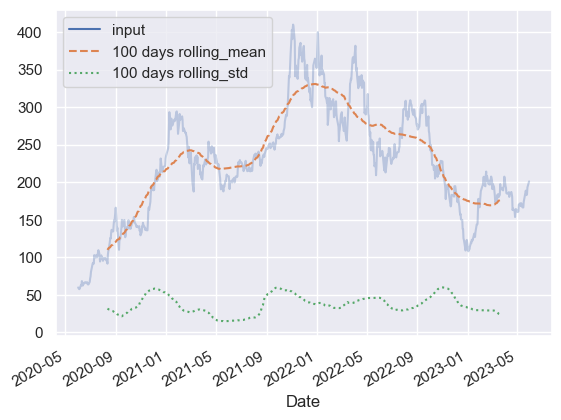

In [31]:
# 100 days centered **rolling mean and standard deviation** of the TESLA stock prices
window_size=100
rolling = colsing_price.rolling(window_size, center=True)
data11 = pd.DataFrame({'input': colsing_price,
                     f'{window_size} days rolling_mean': rolling.mean(),
                     f'{window_size} days rolling_std': rolling.std()})
ax = data11.plot(style=['-', '--', ':'])
ax.lines[0].set_alpha(0.3)

Calculating something like a rolling mean or average is good when analyzing longer term trends in the data and smoothing out short-term fluctuations that might just be noise.